In [1]:
from qiskit import *
import numpy as np
from numpy import linalg as la
from qiskit.tools.monitor import job_monitor
import qiskit.tools.jupyter

$\langle Z \rangle = \langle q| Z |q \rangle = \langle q|0 \rangle \langle 0|q\rangle - \langle q|1 \rangle \langle 1|q\rangle = |\langle 0|q \rangle|^2-|\langle 1|q \rangle|^2 $

$\langle X \rangle = \langle q| X |q \rangle = \langle q|+ \rangle \langle +|q\rangle + \langle q|- \rangle \langle -|q\rangle = |\langle +|q \rangle|^2 + |\langle -|q \rangle|^2 = H (|\langle 0|q \rangle|^2-|\langle 1|q \rangle|^2) $

$\langle Y \rangle = \langle q| Y |q \rangle = -i \langle q|0 \rangle \langle 1|q\rangle + i \langle q|1 \rangle \langle 0|q\rangle = -i \langle X \rangle = S^\dag H (|\langle 0|q \rangle|^2-|\langle 1|q \rangle|^2) $

In [2]:
qc = QuantumCircuit(1)

#### your code goes here

# initialize the state to a random state
qc.rx( np.random.rand()*np.pi*2, 0)
qc.ry( np.random.rand()*np.pi*2, 0)
qc.rz( np.random.rand()*np.pi*2, 0)

In [3]:
# z measurement of qubit 0
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0)

# x measurement of qubit 0
measure_x = QuantumCircuit(1,1)
# your code goes here
measure_x.h(0)
measure_x.measure(0,0)





# y measurement of qubit 0
measure_y = QuantumCircuit(1,1)
# your code goes here
measure_y.sdg(0)
measure_y.h(0)
measure_y.measure(0,0)




shots = 2**14 # number of samples used for statistics
sim = Aer.get_backend('qasm_simulator')
bloch_vector_measure = []
for measure_circuit in [measure_x, measure_y, measure_z]:
    
    # run the circuit with a the selected measurement and get the number of samples that output each bit value
    counts = sim.run(transpile(qc.compose(measure_circuit), sim), shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {}
    for output in ['0','1']:
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector_measure.append( probs['0'] -  probs['1'] )

# normalizing the bloch sphere vector
bloch_vector = bloch_vector_measure/la.norm(bloch_vector_measure)

print('The bloch sphere coordinates are [{0:4.3f}, {1:4.3f}, {2:4.3f}]'
      .format(*bloch_vector))

The bloch sphere coordinates are [0.080, 0.956, -0.282]


In [4]:
from kaleidoscope.interactive import bloch_sphere

bloch_sphere(bloch_vector, vectors_annotation=True)

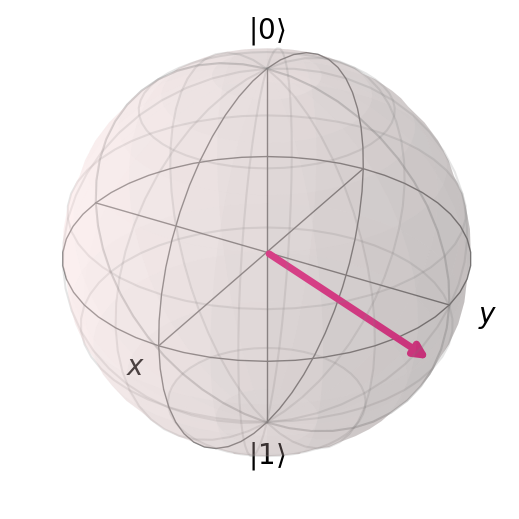

<IPython.core.display.Latex object>

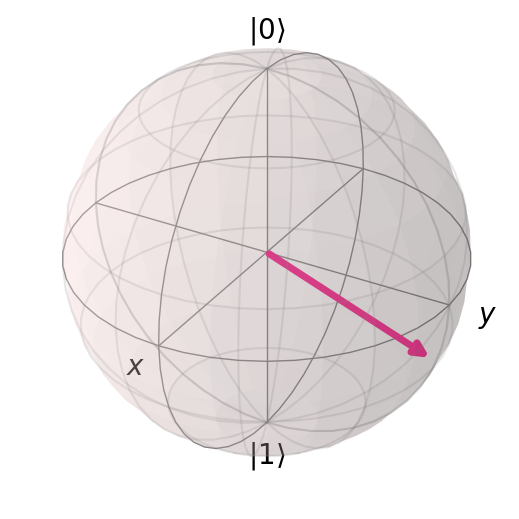

In [5]:
from qiskit.visualization import plot_bloch_vector

display(plot_bloch_vector( bloch_vector ))


state = Aer.get_backend('statevector_simulator')
vec = state.run(transpile(qc, state)).result().get_statevector()

display(vec.draw())

def get_spherical_coordinates(statevector):
    # Convert to polar form:
    r0 = np.abs(statevector[0])
    ϕ0 = np.angle(statevector[0])

    r1 = np.abs(statevector[1])
    ϕ1 = np.angle(statevector[1])

    # Calculate the coordinates:
    r = np.sqrt(r0 ** 2 + r1 ** 2)
    θ = 2 * np.arccos(r0 / r)
    ϕ = ϕ1 - ϕ0
    return [r, θ, ϕ]

display(plot_bloch_vector(get_spherical_coordinates(vec), coord_type = 'spherical'))

$\langle ZZ \rangle = \langle \psi| ZZ |\psi \rangle = \langle \psi|(|0 \rangle \langle 0| - |1 \rangle \langle 1|) \otimes (|0 \rangle \langle 0| - |1 \rangle \langle 1|)|\psi \rangle = |\langle 00|\psi \rangle|^2-|\langle 01|\psi \rangle|^2-|\langle 10|\psi \rangle|^2+|\langle 11|\psi \rangle|^2 $

$\langle XX \rangle = \langle \psi| XX |\psi \rangle = \langle \psi|H(|0 \rangle \langle 0| - |1 \rangle \langle 1|) \otimes H(|0 \rangle \langle 0| - |1 \rangle \langle 1|)|\psi \rangle = H^{\otimes 2}(|\langle 00|\psi \rangle|^2-|\langle 01|\psi \rangle|^2-|\langle 10|\psi \rangle|^2+|\langle 11|\psi \rangle|^2) $

$\langle YY \rangle = \langle \psi| YY |\psi \rangle = \langle \psi|S^\dag H(|0 \rangle \langle 0| - |1 \rangle \langle 1|) \otimes S^\dag H(|0 \rangle \langle 0| - |1 \rangle \langle 1|)|\psi \rangle = {S^{\dag}}^{\otimes 2} H^{\otimes 2}(|\langle 00|\psi \rangle|^2-|\langle 01|\psi \rangle|^2-|\langle 10|\psi \rangle|^2+|\langle 11|\psi \rangle|^2) $

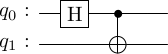

<IPython.core.display.Latex object>

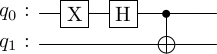

<IPython.core.display.Latex object>

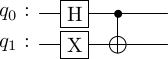

<IPython.core.display.Latex object>

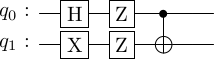

<IPython.core.display.Latex object>

In [6]:
# circuit for the state Tri1
Tri1 = QuantumCircuit(2)
# your code goes here
Tri1.h(0)
Tri1.cx(0,1)

display(Tri1.draw())

state = Aer.get_backend('statevector_simulator')
vec = state.run(transpile(Tri1, state)).result().get_statevector()

display(vec.draw())

# circuit for the state Tri2
Tri2 = QuantumCircuit(2)
# your code goes here
Tri2.x(0)
Tri2.h(0)
Tri2.cx(0,1)

display(Tri2.draw())

state = Aer.get_backend('statevector_simulator')
vec = state.run(transpile(Tri2, state)).result().get_statevector()

display(vec.draw())

# circuit for the state Tri3
Tri3 = QuantumCircuit(2)
# your code goes here
Tri3.x(1)
Tri3.h(0)
Tri3.cx(0,1)

display(Tri3.draw())

state = Aer.get_backend('statevector_simulator')
vec = state.run(transpile(Tri3, state)).result().get_statevector()

display(vec.draw())

# circuit for the state Sing
Sing = QuantumCircuit(2)
# your code goes here
Sing.x(1)
Sing.h(0)
Sing.z(0)
Sing.z(1)
Sing.cx(0,1)

display(Sing.draw())

state = Aer.get_backend('statevector_simulator')
vec = state.run(transpile(Sing, state)).result().get_statevector()

display(vec.draw())

In [7]:
# <ZZ> 
measure_ZZ = QuantumCircuit(2)
measure_ZZ.measure_all()

# <XX>
measure_XX = QuantumCircuit(2)
# your code goes here
measure_XX.h([0,1])
measure_XX.measure_all()



# <YY>
measure_YY = QuantumCircuit(2)
# your code goes here
measure_YY.sdg([0,1])
measure_YY.h([0,1])
measure_YY.measure_all()

In [8]:
shots = 2**16 # number of samples used for statistics

A = 1.47e-6 #unit of A is eV
E_sim = []
for state_init in [Tri1,Tri2,Tri3,Sing]:
    Energy_meas = []
    for measure_circuit in [measure_XX, measure_YY, measure_ZZ]:
    
        # run the circuit with the selected measurement and get the number of samples that output each bit value
        qc = state_init.compose(measure_circuit)
        qc_trans = transpile(qc, sim)
        counts = sim.run(qc_trans, shots=shots).result().get_counts()

        # calculate the probabilities for each computational basis
        probs = {}
        for output in ['00','01', '10', '11']:
            if output in counts:
                probs[output] = counts[output]/shots
            else:
                probs[output] = 0
            
        Energy_meas.append( probs['00'] - probs['01'] - probs['10'] + probs['11'] )
 
    E_sim.append(A * np.sum(np.array(Energy_meas)))

In [9]:
# Run this cell to print out your results

print('Energy expectation value of the state Tri1 : {:.3e} eV'.format(E_sim[0]))
print('Energy expectation value of the state Tri2 : {:.3e} eV'.format(E_sim[1]))
print('Energy expectation value of the state Tri3 : {:.3e} eV'.format(E_sim[2]))
print('Energy expectation value of the state Sing : {:.3e} eV'.format(E_sim[3]))

Energy expectation value of the state Tri1 : 1.470e-06 eV
Energy expectation value of the state Tri2 : 1.470e-06 eV
Energy expectation value of the state Tri3 : 1.470e-06 eV
Energy expectation value of the state Sing : -4.410e-06 eV


In [10]:
# reduced plank constant in (eV) and the speed of light(cgs units)
hbar, c = 4.1357e-15, 3e10

# energy difference between the triplets and singlet
E_del = abs(E_sim[0] - E_sim[3])

# frequency associated with the energy difference
f = E_del/hbar

# convert frequency to wavelength in (cm) 
wavelength = c/f

print('The wavelength of the radiation from the transition\
 in the hyperfine structure is : {:.1f} cm'.format(wavelength))

The wavelength of the radiation from the transition in the hyperfine structure is : 21.1 cm


In [11]:
provider = IBMQ.load_account()

C:\Users\romai\AppData\Local\Temp\ipykernel_7176\2020123530.py:1: DeprecationWarning:

The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'



In [12]:
from qiskit.providers.fake_provider import FakeVigo
backend = FakeVigo()

backend

<FakeVigo('fake_vigo')>

AttributeError: 'FakeVigo' object has no attribute 'jobs'

In [13]:
# assign your choice for the initial layout to the list variable `initial_layout`.
initial_layout = [1,2]

In [14]:
qc_all = [state_init.compose(measure_circuit) for state_init in [Tri1,Tri2,Tri3,Sing] 
          for measure_circuit in [measure_XX, measure_YY, measure_ZZ] ]  

shots = 8192
qc_all_trans = transpile(qc_all, backend, initial_layout=initial_layout, optimization_level=3)
job = backend.run(qc_all_trans, shots=shots)
print(job.job_id())

fe6a95c7-375a-46d3-b0da-86dec830baa0


In [15]:
# getting the results of your job
results = job.result()

In [16]:
def Energy(results, shots):
    """Compute the energy levels of the hydrogen ground state.
    
    Parameters:
        results (obj): results, results from executing the circuits for measuring a hamiltonian.
        shots (int): shots, number of shots used for the circuit execution.
        
    Returns:
        Energy (list): energy values of the four different hydrogen ground states
    """
    E = []
    A = 1.47e-6

    for ind_state in range(4):
        Energy_meas = []
        for ind_comp in range(3):
            counts = results.get_counts(ind_state*3+ind_comp)
        
            # calculate the probabilities for each computational basis
            probs = {}
            for output in ['00','01', '10', '11']:
                if output in counts:
                    probs[output] = counts[output]/shots
                else:
                    probs[output] = 0
            
            Energy_meas.append( probs['00'] - probs['01'] - probs['10'] + probs['11'] )

        E.append(A * np.sum(np.array(Energy_meas)))
    
    return E

In [17]:
E = Energy(results, shots)

print('Energy expection value of the state Tri1 : {:.3e} eV'.format(E[0]))
print('Energy expection value of the state Tri2 : {:.3e} eV'.format(E[1]))
print('Energy expection value of the state Tri3 : {:.3e} eV'.format(E[2]))
print('Energy expection value of the state Sing : {:.3e} eV'.format(E[3]))

Energy expection value of the state Tri1 : 1.356e-06 eV
Energy expection value of the state Tri2 : 1.359e-06 eV
Energy expection value of the state Tri3 : 1.357e-06 eV
Energy expection value of the state Sing : -4.028e-06 eV


In [18]:
from qiskit.ignis.mitigation.measurement import *

C:\Users\romai\AppData\Local\Temp\ipykernel_7176\856465360.py:1: DeprecationWarning:

The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.



In [20]:
# your code to create the circuits, meas_calibs, goes here
meas_calibs, state_labels = complete_meas_cal(qr=2, circlabel='mcal')



# execute meas_calibs on your choice of the backend
job = execute(meas_calibs, backend, shots = shots)
print(job.job_id())
job_monitor(job)
cal_results = job.result()
## To access the results of the completed job
#cal_results = backend.retrieve_job('job_id').result()


# your code to obtain the measurement filter object, 'meas_filter', goes here
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
meas_filter = meas_fitter.filter

e8db2eea-5263-45be-953a-8c4d6970d897
Job Status: job has successfully run


In [21]:
results_new = meas_filter.apply(results)

In [22]:
E_new = Energy(results_new, shots)

print('Energy expection value of the state Tri1 : {:.3e} eV'.format(E_new[0]))
print('Energy expection value of the state Tri2 : {:.3e} eV'.format(E_new[1]))
print('Energy expection value of the state Tri3 : {:.3e} eV'.format(E_new[2]))
print('Energy expection value of the state Sing : {:.3e} eV'.format(E_new[3]))

Energy expection value of the state Tri1 : 1.448e-06 eV
Energy expection value of the state Tri2 : 1.451e-06 eV
Energy expection value of the state Tri3 : 1.449e-06 eV
Energy expection value of the state Sing : -4.329e-06 eV


In [23]:
# results for the energy estimation from the simulation, 
# execution on a quantum system without error mitigation and
# with error mitigation in numpy array format 
Energy_exact, Energy_exp_orig, Energy_exp_new = np.array(E_sim), np.array(E), np.array(E_new)

In [24]:
# Calculate the relative errors of the energy values without error mitigation 
# and assign to the numpy array variable `Err_rel_orig` of size 4
Err_rel_orig = np.round(np.abs(Energy_exact - Energy_exp_orig)/Energy_exact, 4)

In [26]:
# Calculate the relative errors of the energy values with error mitigation 
# and assign to the numpy array variable `Err_rel_new` of size 4
Err_rel_new = np.round(np.abs(Energy_exact - Energy_exp_new)/Energy_exact, 4)

In [27]:
np.set_printoptions(precision=3)

print('The relative errors of the energy values for four bell basis\
 without measurement error mitigation : {}'.format(Err_rel_orig))

The relative errors of the energy values for four bell basis without measurement error mitigation : [ 0.078  0.075  0.077 -0.087]


In [28]:
np.set_printoptions(precision=3)

print('The relative errors of the energy values for four bell basis\
 with measurement error mitigation : {}'.format(Err_rel_new))

The relative errors of the energy values for four bell basis with measurement error mitigation : [ 0.015  0.013  0.014 -0.018]
